# KAIP Week 3 - Tutorial 2

## A. Install Cawemo for Business Process Model Notation (for Thursday)
https://cawemo.com/

## B. Supervised Learning Tutorial: Classification

<img src = 'Picture1.png'>


### What is classification?
From Wikipedia : 

In machine learning and statistics, classification is the problem of identifying to which of a set of categories (sub-populations) a new observation belongs, on the basis of a training set of data containing observations (or instances) whose category membership is known. Examples are assigning a given email to the "spam" or "non-spam" class, and assigning a diagnosis to a given patient based on observed characteristics of the patient (sex, blood pressure, presence or absence of certain symptoms, etc.).

<img src = 'week1.png'>


### Key Terminology
1. Training, validation and testing set
2. Hyperparameter
3. Cross-validation, Model Selection
4. Activation Function:
    - sigmoid
    - relu (tomorrow)
5. Loss/ Error/ Cost Function
    - Cross entropy (binary entropy)
    - Hinge Loss
6. Optimization methods (i.e. solvers)
    - Newton's method
    - Stochastic Average Gradient Descent (SAG)
    - Variant of Stochastic Average Gradient Descent (SAGA)
7. Classifiers:
    - K-Nearest Neighbor (KNN)
    - Decision Trees (DT)
    - Logistic Regression (LR)
    - Support Vector Machine (SVM)
8. Performance Metrics:
    - Accuracy



### Dataset
In this tutorial, we will look at a a very early dataset, from R.A. Fischer's 1936 paper, "The Use of Multiple Measurements in Taxonomic Problems". This dataset consists of different measurements of Iris flowers, with the corresponding species of Iris.
It's a nice dataset to get started with because of its simplicity and small size, so we can easily play around with different algorithms.

**Question**: Draw the black box model for the problem of classification of Iris data

### *Now, let's train some classification models using the Iris dataset!* 😃

### (1) Import Relevant Libraries

In [2]:
import numpy as np
import random
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from KAIP3_classification1_helpers import *

### (2) Import Dataset

In [3]:
data = pd.read_csv('Iris_augmented.csv', index_col = 0)

### (3) Data Exploration

Let's do some more pandas magic


In [4]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


__Question__: What are the features? What are the labels?

In [5]:
print('Features:\n',data.columns[1:4])
print('\nLabels:')
print(data['Species'].value_counts())

Features:
 Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm'], dtype='object')

Labels:
Iris-setosa        100
Iris-virginica     100
Iris-versicolor    100
Name: Species, dtype: int64


***
We can get more information about the dataset, including non null variables, memory usage, ... 
In machine learning, clean and well understood data is absolutely crucial, therefore this information is always good to have.
***

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 0 to 149
Data columns (total 6 columns):
Id               300 non-null int64
SepalLengthCm    300 non-null float64
SepalWidthCm     300 non-null float64
PetalLengthCm    300 non-null float64
PetalWidthCm     300 non-null float64
Species          300 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 16.4+ KB


***
We can also use the "describe" method to get some statistics on our numerical features, including mean, standard deviation, etc.
***

In [7]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,300.000000,300.000000,300.000000,300.000000,300.000000
mean,75.500000,5.842933,3.041530,3.765113,1.199737
std,43.372656,0.867981,0.438322,1.776911,0.766889
min,1.000000,4.230000,1.820000,1.000000,0.094000
25%,38.000000,5.100000,2.759000,1.590000,0.300000
50%,75.500000,5.797500,3.000000,4.323000,1.301000
75%,113.000000,6.444250,3.300000,5.139750,1.800000
max,150.000000,8.162000,4.410000,7.236000,2.725000


***
Let's make a nice plot of the dataset. <br>
__Question__: How do you read this plot?
***

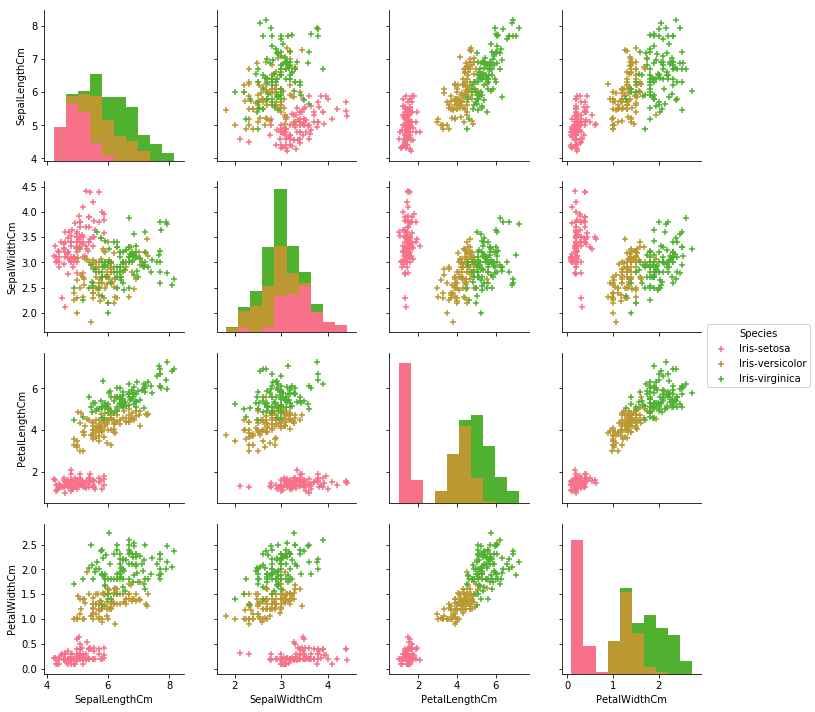

In [8]:
tmp = data.drop('Id', axis=1)
g = sns.pairplot(tmp, hue='Species', markers='+')
plt.show()

In [9]:
X = data.drop(['Id', 'Species'], axis=1)
y = data['Species']

print(X.shape)
print(y.shape)

(300, 4)
(300,)


## II. Training models with scikit-learn 

We will now go through a series of famous and widely used classifiers.

### 0. Splitting the data

First, we need to separate the data into different sets. These are training, validation, and test sets. 
Remember, the test set is a treasure chest that you need to use only at the very end. However, as you remember from the previous lecture, most algorithms have "hyperparameters" you can tune. How to choose the best ones? You just use the validation set for that !

<img src = 'data_split_image.png'>


In [11]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.3, random_state=5)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.4, random_state=15)

print('Training set contains ' + str(len(y_train)) + ' examples')
print('Validation set contains ' + str(len(y_val)) + ' examples')
print('Test set contains ' + str(len(y_test)) + ' examples')


Training set contains 126 examples
Validation set contains 84 examples
Test set contains 90 examples


### 1. K-nearest-neighbours 

As our first approach, we will develop what we call a K-Nearest-Neighbors Classifier. This classifier is rarely used in practice, but it will allow us to get an idea about the basic approach to a classification problem.
The KNN classifier will take a test datapoint, compare it to every single one of the training datapoints, and predict the label based on a majority vote of the K closest training examples.

#### Group exercise
Take 10mn with your team to review the main points of the lecture regarding K-nearest-neighbors. Summarize the main ideas and the take home messages.


In [ ]:
### Let's use a KNN with k = 2

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)

print('The accuracy is ' + str(100*score) + '%')

***
We've just implemented a KNN in a few lines of codes, which achieved 91% accuracy on the test set. That is, it correctly classified 91% of the flowers in the test set.
<br>
However, we just randomly set K to be 2. Could we have set it to a better number ? This is where the validation set comes in. We can try different values of K, and look at their performance on the validation set. Then, once we've decided on the prefered value, we can use it on the test set.
***


#### Model Selection: How do we select the value of k?
Using the validation set!

In [ ]:
# experimenting with different k values
k_range = list(range(1,30))
scores = []
models = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_val)
    scores.append(metrics.accuracy_score(y_val, y_pred))
    models.append(knn)
    
plt.plot(k_range, scores)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel('Value of k for KNN', fontsize = 20)
plt.ylabel('Accuracy Score', fontsize = 20)
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors', fontsize = 14)
plt.show()

In [ ]:
n_neighb = 5

y_pred = models[n_neighb-1].predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
print('The accuracy is ' + str(100*score) + '%')

***
Indeed, it turns out that n = 2 wasn't the best choice, and we achieve better accuracy on the test set thanks to hyper parameter tuning ! 
***

***
We can now visualize how the model makes its decisions. For that, we will look at only two features: the sepal length and the sepal width, so that we can conveniently plot the data.
***

In [ ]:
n_neighb = 5

clf_knn = KNeighborsClassifier(n_neighbors=n_neighb)

plot_model_iris(clf_knn, X_train, y_train)

__Question__ : Visualize the KNN decision boundaries for several number of neighbors. How are the boundaries changing? Why? 

__Summary__: KNNs work by remembering all the training data and comparing new data to it. An advantage of the KNN is that they are very easy to train and understand. However, this also means that they require a lot of memory, especially for bigger, more realistic datasets, which is very impractical.



### 2. Decision Trees


Decision trees are a very popular algorithm because of how intuitive they are. As we will see, we can very easily interpret what they do.

#### Group exercise
Take 10mn with your team to review the main points of the lecture regarding Decision Trees. Summarize the main ideas and the take home messages.

In [ ]:
# experimenting with different k values
depth_range = list(range(1,30))
scores = []
models = []
for d in depth_range:
    clf_tree = DecisionTreeClassifier(criterion ='entropy', max_depth = d)
    clf_tree.fit(X_train, y_train)
    y_pred = clf_tree.predict(X_val)
    scores.append(metrics.accuracy_score(y_val, y_pred))
    models.append(clf_tree)
    
plt.plot(depth_range[1:], scores[1:])
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel('Value of depth for DT', fontsize = 20)
plt.ylabel('Accuracy Score', fontsize = 20)
plt.title('Accuracy Scores for values of depth for DT', fontsize = 14)
plt.show()

In [ ]:
depth = 4

y_pred = models[depth-1].predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
print('The accuracy is ' + str(100*score) + '%')

We can visualize what the tree with the graphviz library. In the image below you can see how a tree with depth two reaches a decision, if it's only trained on the features "sepal width" and "sepal length"

<img src='decision_tree_plot_iris.png'>

***
We can then plot the decision boundaries. Like we've just seen in the graph above, the boundaries are indeed vertical and horizontal lines than allow us to take binary decisions !
***

In [ ]:
clf_tree = DecisionTreeClassifier(criterion ='entropy', max_depth = 2)

plot_model_iris(clf_tree, X_train, y_train)

__Summary__: Decision trees are very easy to interpret, they are so to say a white box! They also have other advantages like automatic feature selection. However, they also suffer from drawbacks such as their tendency to overfit, i.e. fit the noise in the data ! They can also grow very fast for more complex datasets, where they end up losing interpretability.

### 3. Logistic Regression

Logistic regression is a popular classifier, for instance because its outputs can be interpreted as probabilities of a certain class. <br>
It is very similiar to the Perceptron you saw in the class. The major advantage is that the activation function of LR is differentiable, as we will see, and we can now do gradient descent more efficiently ! 
<br>
Just like the Perceptron, LR uses a parametric approach: it has a set of parameters (the weights,stored in an array $W$, and the biases $b$), it then takes the inputs $x$, and applies a "score function" $z = Wx +b$ . It also has a an activation function called sigmoid $G = 1/1+exp(-z)$. Finally, it has a loss function to compare the output to the label of the training example $y$, which is called the cross entropy loss $ L = y * log(G) - (1 - y)*log(1-G)$. These equations might be intimidating at first, but we'll see that they are very intuitive. For a great information theory view on cross-entropy loss, please refer to this link: https://rdipietro.github.io/friendly-intro-to-cross-entropy-loss/
<br>
Let's look at a diagram.
<img src = 'lr_flow.png'>


__Question 1__ :
Below is a diagram of the activation function for LR: the sigmoid function $G = 1/1+exp(-z)$
<img src = 'sigmoid.png'>
This activation function received a score z = Wx + b for a given input. What happens if the score z is high? If it is low? Can you interpret this in terms of probabilities?

__Question 2__:
Let's now look at the loss function. What is the value of the loss L if our training example is  class 0, but LR outputs a value of 0.1? Replace y and G with these numbers to find out the value of L. 
If our training is class 0 and LR outputs a value of 0.1? <br> 
If our training is class 1 and LR outputs class 0.9? <br>
If our training is class 1 and LR outputs class 0.1?<br>

The advantage of this parametric approach is that once we learn the parameters we can discard the training data. Additionally, the prediction for a new test image is fast since it requires a single matrix multiplication with W, not an exhaustive comparison to every single training example.<br>
See these excellent Stanford lecture notes http://cs231n.github.io/linear-classify/ for more details.

#### Group exercise
Take 10mn with your team to review the main points of the lecture regarding Logistic regression. Summarize the main ideas and the take home messages.


***
To train SVM, we can use gradient descent. Remember function maximization/minimization from the optimization lecture? Now we're doing exactly that ! <br>
Indeed, we have seen that we use a __loss function__ to compare the output of LR, to the label of our training example. What do we want to do with this loss? Minimize it ! <br>

Our problem is fairly easy, so the loss is probably fairly easy, maybe looking something like this (note: this plot is not from our case, but it won't be very complex)
<img src = 'easy_loss_landscape.png'>
In practice, loss functions can be very complicated, so getting to an optimum is quite a tricky process.
Here is an example of a realistic loss function from an image recognition task, where we need to adjust the parameters to get exactly to the minimum. Not that easy!
<img src = 'loss_landscape.png'>
Loss plots source: https://arxiv.org/pdf/1712.09913.pdf
***

In [14]:
### solver = 'newton-cg' is a type of gradient descent optimizer
clf_lr = LogisticRegression(solver='newton-cg', C=1e10, multi_class='ovr', max_iter = 10000)

clf_lr.fit(X_train, y_train)

y_pred = clf_lr.predict(X_test)
score = metrics.accuracy_score(y_pred, y_test)
print('The accuracy is ' + str(100*score) + '%')

The accuracy is 95.55555555555556%


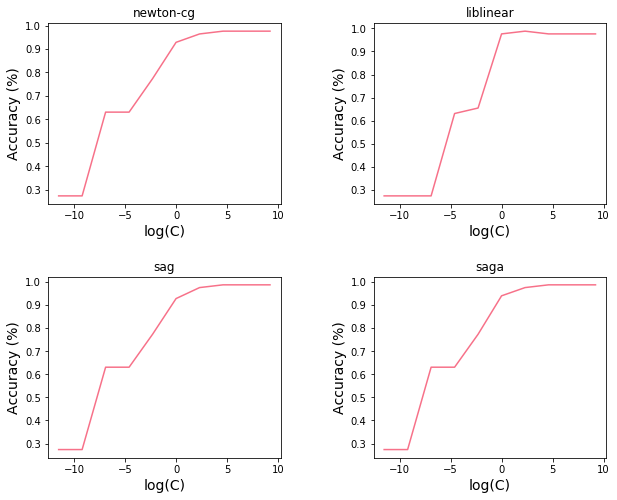

In [13]:
# Different optimization techniques i.e. solvers
solvers = ['newton-cg', 'liblinear', 'sag', 'saga']
C = [1e-5, 1e-4, 1e-3, 1e-3, 0.01, 0.1, 1, 10 , 100, 1000, 10000]

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2, figsize = (10, 8))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

for solver, ax in zip(solvers, sub.flatten()):
    
    scores = []
    
    for c in C:
        
        clf_lr = LogisticRegression(solver=solver, C=c, max_iter = 10000, multi_class = 'ovr')
        clf_lr.fit(X_train, y_train)
        y_pred = clf_lr.predict(X_val)
        scores.append(metrics.accuracy_score(y_val, y_pred))
       
    ax.plot(np.log(C), scores)
    ax.set_xlabel('log(C)', fontsize = 14)
    ax.set_ylabel('Accuracy (%)', fontsize = 14)    
    ax.set_title(solver)

In [ ]:
clf_lr = LogisticRegression(solver='newton-cg', C=10, max_iter = 10000)

plot_model_iris(clf_lr, X_train, y_train)

__Summary__: LR is a go to algorithm as a first test in many problems. One of its main attractive features is that you can interpret its output as probablities.

### 4. Support Vector Machine (SVM)

SVM is another very popular classifier which is very similar to LR, except it has no activation function, and it has a different loss. Indeed, SVM uses the hinge loss, which can not be interpreted as class probabilities. However, it has other very attractive features, such as optimal margins. In practice, LR and SVM give similar results. 
See these excellent Stanford lecture notes http://cs231n.github.io/linear-classify/ for more details.

Let's look at a diagram.

<img src = 'svm_flow.png'>

__Question__:
What is the loss if the label of the training example is 1, and our score function z produces a positive result greater than 1? Between 0 and 1?  A negative result?
What is the loss if the label of the training example is -1, and our score function z produces a negative result smaller than -1? Between -1 and 0?  A positive result?
<br>
An important feature of SVM is that they can be extended to non linear classification (the boundaries would not be straight lines anymore), using the so called "Kernel trick".



In [ ]:
clf_svm = svm.SVC(kernel = 'linear', C=1, max_iter = 1000000)

clf_svm.fit(X_train, y_train)

y_pred = clf_svm.predict(X_test)
score = metrics.accuracy_score(y_pred, y_test)
print('The accuracy is ' + str(100*score) + '%')

In [ ]:
kernels = ['linear', 'poly', 'rbf']
C = [1e-5, 1e-4, 1e-3, 1e-3, 0.01, 0.1, 1, 10 , 100, 1000]

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2, figsize = (10, 8))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

for kernel, ax in zip(kernels, sub.flatten()):
    
    scores = []
    
    for c in C:
        
        clf_svm = svm.SVC(kernel = kernel, C=c, max_iter = 1000000)
        clf_svm.fit(X_train, y_train)
        y_pred = clf_svm.predict(X_val)
        scores.append(metrics.accuracy_score(y_val, y_pred))
       
    ax.plot(np.log(C), scores)
    ax.set_xlabel('log(C)', fontsize = 14)
    ax.set_ylabel('Accuracy', fontsize = 14)    
    ax.set_title(kernel)

In [ ]:
clf_svm = svm.SVC(kernel = 'linear', C=10, max_iter = 10000000)

plot_model_iris(clf_svm, X_train, y_train)

__Summary__: SVM is a go to algorithm as a first test in many problems. In practice, SVM and LR are usually comparable. The performance difference between the SVM and LR is usually very small, and different people will have different opinions on which classifier works better. An attractive feature of SVM is that is maximize the classification margin.